# Gaussian Process Regression in GPy

# Gaussian Process Summer School, Melbourne, Australia
### 25th-27th February 2015
### Neil D. Lawrence and Nicolas Durrande

In the introduction to `GPy` you saw how it was possible to build covariance functions with the GPy software. The covariance function contains the assumptions about the data in it. In the Gaussian process, the covariance funciton *encodes* the model. However, to make predictions, you need to combine the model with data. 

If the data we are given, $\mathbf{y}$ is *real* valued, then the problem is known as a regression problem. If a Gaussian noise model is used, then this is known as Gaussian process regression.


In [5]:
%matplotlib inline
import numpy as np
import pods
import pylab as plt
import GPy
from IPython.display import display

/Users/neil/Library/Enthought/Canopy_64bit/User/lib/python2.7/site-packages/pytz/__init__.py:29: UserWarning: Module pods was already imported from /Users/neil/sods/ods/pods/__init__.pyc, but /Users/neil/Library/Enthought/Canopy_64bit/User/lib/python2.7/site-packages is being added to sys.path
  from pkg_resources import resource_stream


We will now combine the Gaussian process prior with some data to form a GP regression model with GPy. We will generate data from the function 
$$
f(x) = − \cos(\pi x ) + \sin(4\pi x )
$$ 
over $[0, 1]$, adding some noise to give $y(x) = f(x) + \epsilon$, with the noise being Gaussian distributed, $\epsilon \sim \mathcal{N}(0, 0.01)$. 

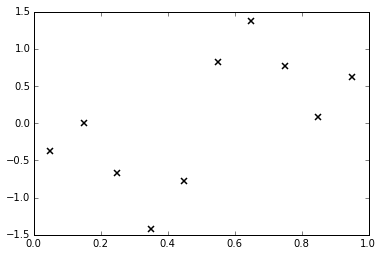

In [6]:
X = np.linspace(0.05,0.95,10)[:,None]
Y = -np.cos(np.pi*X) + np.sin(4*np.pi*X) + np.random.normal(loc=0.0, scale=0.1, size=(10,1)) 
plt.figure()
plt.plot(X,Y,'kx',mew=1.5)

A GP regression model based on an exponentiated quadratic covariance function can be defined by first defining a covariance function, 

In [7]:
k = GPy.kern.RBF(input_dim=1, variance=1., lengthscale=0.2)

And then combining it with the data to form a Gaussian process model,

In [8]:
model = GPy.models.GPRegression(X,Y,k)

Just as for the covariance function object, we can find out about the model using the command `display(m)`. 

In [9]:
display(model)

Note that by default the model includes some observation noise
with variance 1. We can see the posterior mean prediction and visualize the marginal posterior variances using 
```python
model.plot()
```

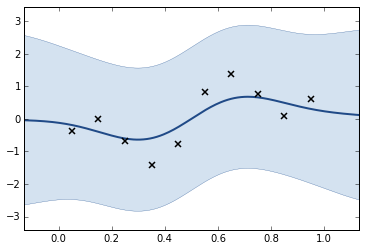

In [11]:
_ = model.plot()

The actual predictions of the model for a set of points `Xstar`
(an $m \times p$ array) can be computed using 

```python
Ystar, Vstar, up95, lo95 = model.predict(Xstar)`
```

### Exercise 1

What do you think about this first fit? Does the prior given by the GP seem to be
appropriate?

### Exercise 2

The parameters of the models can be modified using the parameter name, for example 
```python
model.Gaussian_noise.variance = 0.001
```
Change the values of the parameters to obtain a better fit.

In [12]:
# Exercise 2 answer here

As we saw when we introduced GPy and covariance functions, random sample paths from the conditional GP can be obtained using
```python
np.random.multivariate_normal(mu[:,0],C)
``` 
Now you can sample paths from the *posterior* process by first obtaining the mean and covariance of the posterior, `mu` and `C`. These can be obtained from the `predict` method, 
```python
mu, C, up95, lo95 = model.predict(Xp,full_cov=True)
```


### Exercise 3

Obtain 10 samples from the posterior sample and plot them alongside the data below.

In [13]:
# Exercise 3